In [1]:
# Задача 1.1
# Машинная бесконечность
inf = 1.0
inf1 = 2.0
while inf1 * 10.0 != inf1 :
    inf1 *= 10.0
    inf *= 10.0
print(f"Машинная бесконечность = {inf:.2e}")
# Машинный ноль
zero = 1.0
while zero*0.5 != 0 :
    zero *= 0.5
print(f"Машинный ноль = {zero:.2e}")
# Машинный эпсилон
eps = 1.0
while 1.0 + 0.5*eps != 1.0:
    eps *= 0.5
eps *= 0.5
print(f"Машинный эпсилон = {eps:.2e}")

Машинная бесконечность = 1.00e+308
Машинный ноль = 4.94e-324
Машинный эпсилон = 1.11e-16


In [2]:
# Задача 1.2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def F(x):
    return np.arctan(x)
def n_term(x, k):
    return (-1)**k * x**(2*k+1)/(2*k+1)
def S(x, N):
    res = 0
    for i in range(N):
        res += n_term(x, i)
    return res

In [4]:
a = 0
b = 0.8
c = (a + b)/2
x_data = np.linspace(a, b, 1000)

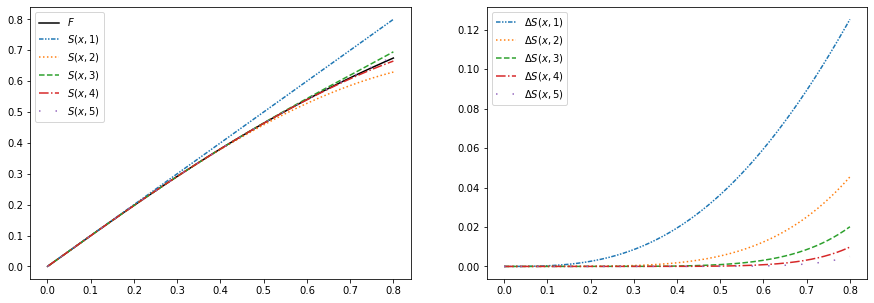

In [5]:
#делаем рисунок из двух графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
#рисуем на первом графике F
axs[0].plot(x_data, F(x_data), label='$F$', color="black")
#задаем кортеж из стилей линий
line_styles = ((0, (3, 1, 1, 1, 1, 1)), 'dotted', 'dashed', 'dashdot', (0, (1, 10)))
#в цикле рисуем S на первом графике
for i in range(1,6):
    axs[0].plot(x_data, S(x_data, i), label=f'$S(x,{i})$', ls=line_styles[i-1])
#в цикле рисуем погрешность S на втором графике
for i in range(1,6):
    axs[1].plot(x_data, np.abs(S(x_data, i)-F(x_data)), label=f'$\Delta S(x,{i})$', ls=line_styles[i-1])
axs[0].legend()
axs[1].legend()

In [6]:
#Определил количество членов ряда N, при котором величина относительной погрешности
#в средней точке отрезка станет меньше машинного эпсилон
p_sum = n_term(c, 1)
N_machine_error = 2
n_t = n_term(c, 2)
while np.abs(n_t/p_sum) > eps:
    p_sum += n_t
    N_machine_error += 1
    n_t = n_term(c, N_machine_error)
print(N_machine_error)

20


[(0.0, 1e-14)]

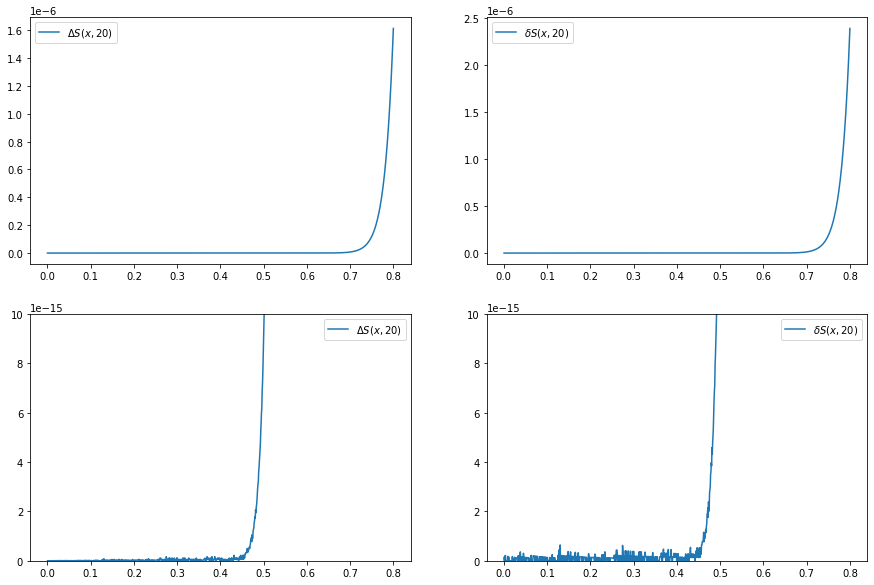

In [7]:
#делаем рисунок из четырех графиков (абсолютной и относительной погрешности)
np.seterr(divide='ignore', invalid='ignore')
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0][0].plot(x_data, np.abs(F(x_data) - S(x_data, N_machine_error)), label=f'$\Delta S(x,{N_machine_error})$')
axs[0][1].plot(x_data, np.abs((F(x_data) - S(x_data, N_machine_error))
                              /S(x_data, N_machine_error)), label=f'$\delta S(x,{N_machine_error})$')
axs[1][0].plot(x_data, np.abs(F(x_data) - S(x_data, N_machine_error)), label=f'$\Delta S(x,{N_machine_error})$')
axs[1][1].plot(x_data, np.abs((F(x_data) - S(x_data, N_machine_error))
                              /S(x_data, N_machine_error)), label=f'$\delta S(x,{N_machine_error})$')
axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
axs[1][0].set(ylim=(0.0, 10E-15))
axs[1][1].set(ylim=(0.0, 10E-15))

In [8]:
#Составил программу округления вычислений результата до t разрядов мантиссы
def ROUND(x):
    return np.float(np.format_float_scientific(x, precision=4))
print(111111111, ROUND(111111111))
print(0.000000111111111, ROUND(0.000000111111111))

111111111 111110000.0
1.11111111e-07 1.1111e-07


In [9]:
#Произвел расчеты п. 4 с учетом округления
def S_rounded_(x, N):
    res = 0
    for i in range(N):
        res += ROUND(n_term(x,i))
        res = ROUND(res)
    return res
def S_rounded(x, N):
    res = x.copy()
    for i in range(len(x)):
        res[i] = S_rounded_(x[i], N)
    return res

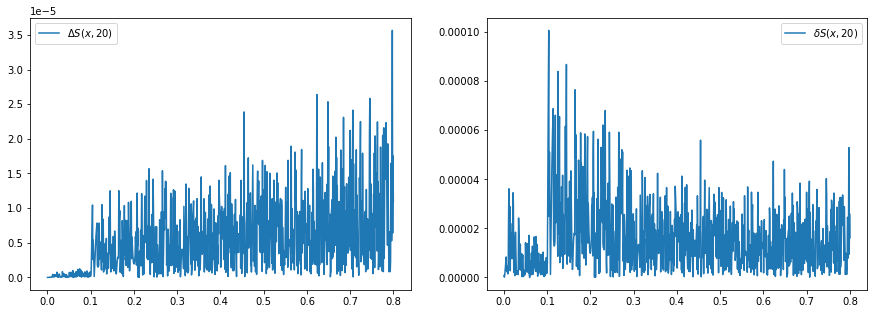

In [10]:
#делаем рисунок из четырех графиков
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(x_data, np.abs(F(x_data) - S_rounded(x_data, N_machine_error)), label=f'$\Delta S(x,{N_machine_error})$')
axs[1].plot(x_data, np.abs((F(x_data) - S_rounded(x_data, N_machine_error)) /
                           S_rounded(x_data, N_machine_error)), label = f'$\delta S(x,{N_machine_error})$')
axs[0].legend()
axs[1].legend()

In [ ]:
# Вывод:
# Из графиков Out[5] мы видим, что чем больше слагаемых в сумме ряда Тейлора для заданной функции, тем сильнее
# график функции, задающий сумму ряда Тейлора, "прижимается" к графику исходной функции. Значение абсолютной
# погрешности тем меньше, чем больше членов разложения в сумме ряда. Следовательно, чем больше членов ряда мы
# включим в сумму, тем с большей точностью и меньшей погрешностью мы получим результат. Также заметим, что погрешность
# увеличивается при движении от левой границы отрезка (0) к правой границе (0,8).
# Количество членов ряда N, при котором величина относительной погрешности в средней точке отрезка станет < маш.eps. = 20
# На графиках Out[7] абсолютной и относительной погрешности наблюдаем резкие увеличения погрешности.
# Из графиков Out[10] видно, что погрешность в разы увеличивается при округлениях, т.е. теряется точность.